In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import gen_domains, plot_domains, plot_KMeans1D, plot_GMM1D
image_size = 256

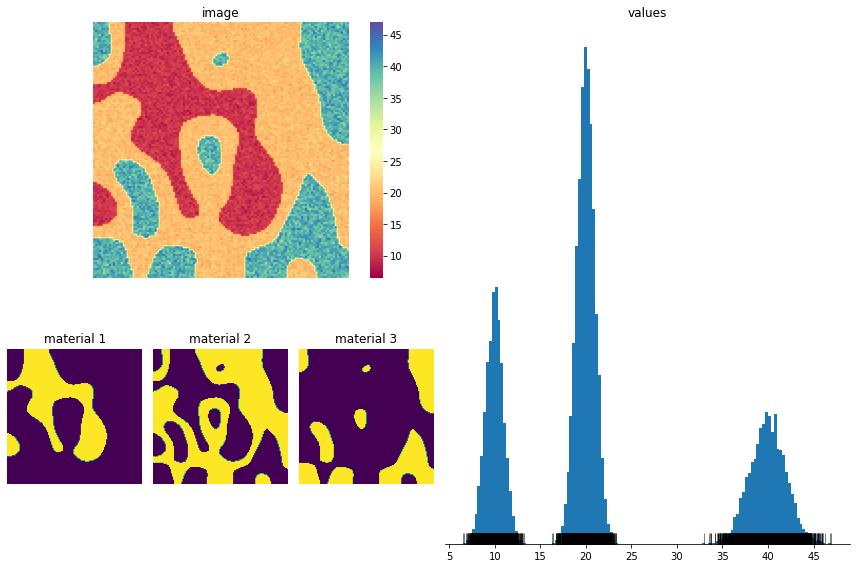

In [2]:
distinct_image, distinct_materials = gen_domains(populations=(1, 2, 1), means=(10, 20, 40), stds=(1, 1, 2))
plot_domains(distinct_image, distinct_materials);

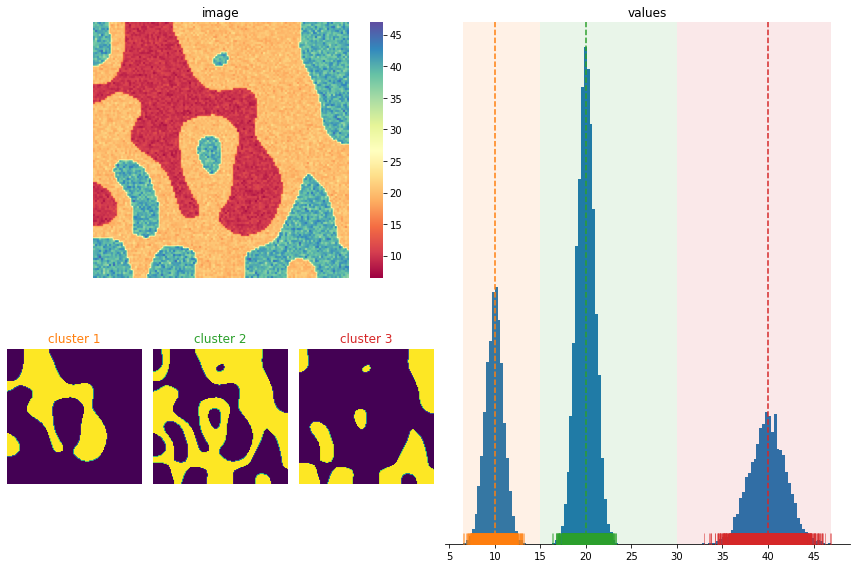

In [3]:
_, kmeans_distinct = plot_KMeans1D(distinct_image, k=3);

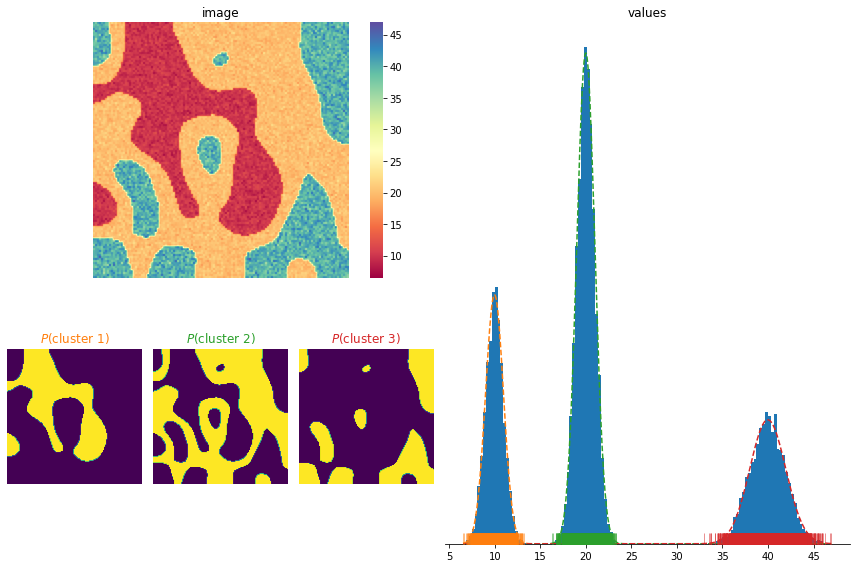

In [4]:
_, GMM_distinct = plot_GMM1D(distinct_image, k=3);

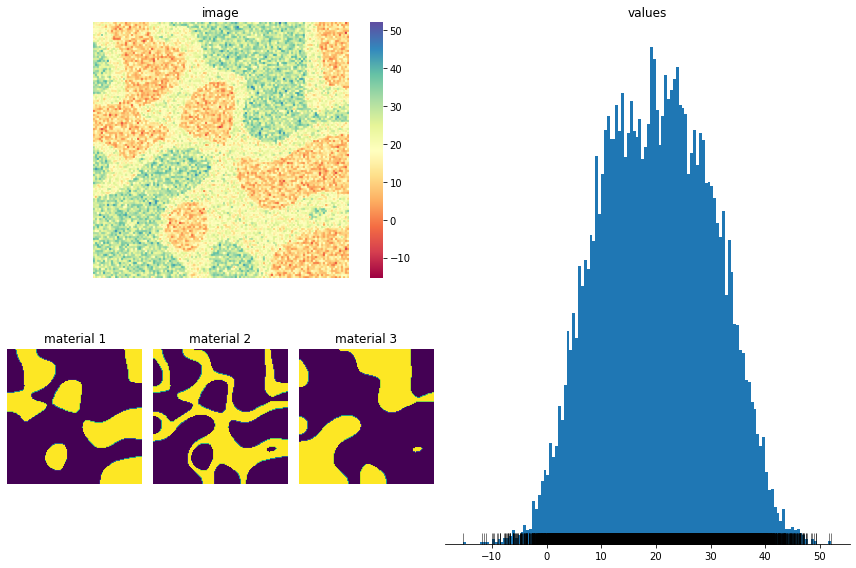

In [5]:
muddled_image, muddled_materials = gen_domains(populations=(1, 1, 1), means=(10, 20, 30), stds=(6, 6, 6))
plot_domains(muddled_image, muddled_materials);

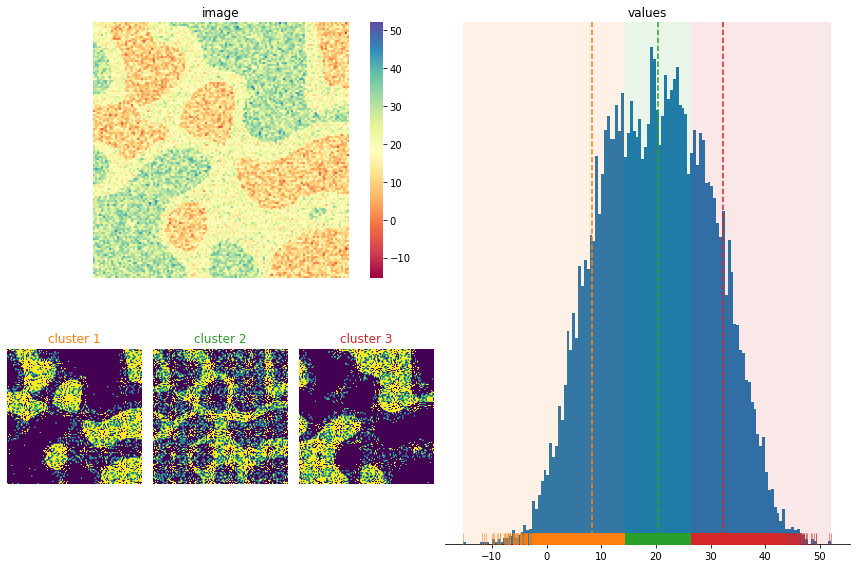

In [6]:
_, kmeans_muddled = plot_KMeans1D(muddled_image, k=3);

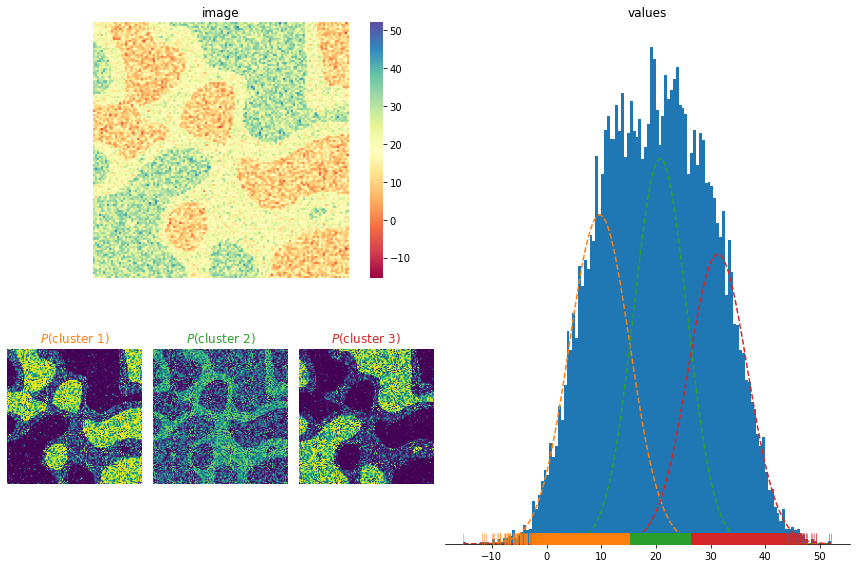

In [7]:
_, GMM_muddled = plot_GMM1D(muddled_image, k=3);